In [1]:
import numpy as np
import networkx as nx
import scipy.linalg as la
import nb_general as nb
from matplotlib import pyplot as plt

In [138]:
# Create G
G = nx.Graph([[1,2],[2,3],[3,4],[4,1],[1,5],[4,5]])
A = nx.adjacency_matrix(G).todense()

In [139]:
# Get eigenvectors
vals, vecs = la.eig(A)

In [140]:
# Create diagonal matrix
D = np.diag(list(dict(G.degree).values()))

In [141]:
# Create perturbed matrix in questions
K = np.block([[A,D-np.eye(D.shape[0])],[-np.eye(D.shape[0]),np.zeros_like(D)]])

In [142]:
# Get eigenvectors
kvals, kvecs = la.eig(K)

In [143]:
kvecs[:,1]

array([ 0.31622777+0.j,  0.31622777+0.j,  0.31622777+0.j,  0.31622777+0.j,
        0.31622777+0.j, -0.31622777+0.j, -0.31622777+0.j, -0.31622777+0.j,
       -0.31622777+0.j, -0.31622777+0.j])

In [144]:
K@kvecs[:,1]

matrix([[ 0.31622777+0.j,  0.31622777+0.j,  0.31622777+0.j,  0.31622777+0.j,
          0.31622777+0.j, -0.31622777+0.j, -0.31622777+0.j, -0.31622777+0.j,
         -0.31622777+0.j, -0.31622777+0.j]])

In [145]:
x = vecs[:,1]
y = kvecs[kvecs.shape[0]//2:,1]

In [146]:
x.T@y

(5.9270421997422126e-17+0j)

In [147]:
x.T@D@y

(2.2956314645735988e-16+0j)

In [148]:
kvals[1]

(1.0000000000000004+0j)

In [149]:
vals[1]

(-1.9999999999999996+0j)

In [2]:
xy = []
xDy = []
change = []
mu_lamb_xy = []
mu_xDy = []
lamb_xy = []
rare_cases = []
for _ in range(10000):
    # create G
    G = nx.random_partition_graph([50,50],0.25,.05)
    F = list(nx.connected_component_subgraphs(G))
    G = F[0]
    # Create K
    A = nx.adjacency_matrix(G).todense()
    D = np.diag(list(dict(G.degree).values()))
    K = np.block([[A,D-np.eye(D.shape[0])],[-np.eye(D.shape[0]),np.zeros_like(D)]])
    
    # Get eigs
    vals, vecs = la.eig(A)
    kvals, kvecs = la.eig(K)
    
    # Find change
    change.append(kvals[1] - vals[1])
    if change[-1] > 0:
        rare_cases.append(G)
    xy.append(vecs[:,1].T@kvecs[kvecs.shape[0]//2:,1])
    xDy.append(vecs[:,1].T@D@kvecs[kvecs.shape[0]//2:,1])
    mu_lamb_xy.append(kvals[1]*vals[1]*vecs[:,1].T@kvecs[kvecs.shape[0]//2:,1])
    mu_xDy.append(kvals[1]*xDy[-1])
    lamb_xy.append(vals[1]*xy[-1])
    
#     print(f'$x^Ty$:{vecs[:,1]@kvecs[kvecs.shape[0]//2:,1]}\t$x^TDy$:{vecs[:,1]@D@kvecs[kvecs.shape[0]//2:,1]}')#\n$\lambda$:{vals[1]}\t$\mu$:{kvals[1]}')

In [3]:
xy = np.array(xy)
xDy = np.array(xDy)
mu_lamb_xy = np.array(mu_lamb_xy)
lamb_xy = np.array(lamb_xy)
mu_xDy = np.array(mu_xDy)
change = np.array(change)

/anaconda/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


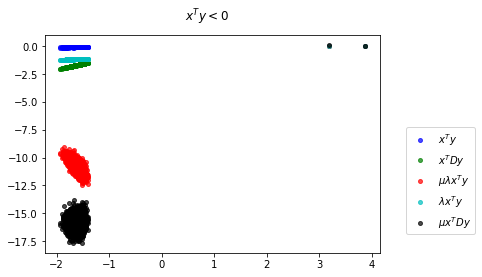

In [4]:
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(change[xy<0],xy[xy<0],'o',markersize=4,alpha=.7,color='b',label='$x^Ty$')
ax.plot(change[xy<0],xDy[xy<0],'o',markersize=4,alpha=.7,color='g',label='$x^TDy$')
ax.plot(change[xy<0],mu_lamb_xy[xy<0],'o',markersize=4,alpha=.7,color='r',label='$\mu\lambda x^Ty$')
ax.plot(change[xy<0],lamb_xy[xy<0],'o',markersize=4,alpha=.7,color='c',label='$\lambda x^Ty$')
ax.plot(change[xy<0],mu_xDy[xy<0],'o',markersize=4,alpha=.7,color='k',label='$\mu x^TDy$')
ax.legend(bbox_to_anchor=(1.3,.6))
plt.suptitle('$x^Ty<0$')
plt.show()

/anaconda/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


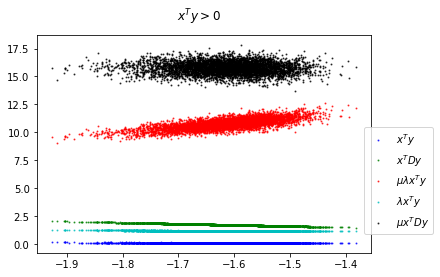

In [5]:
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(change[xy>0],xy[xy>0],'o',markersize=1,alpha=.7,color='b',label='$x^Ty$')
ax.plot(change[xy>0],xDy[xy>0],'o',markersize=1,alpha=.7,color='g',label='$x^TDy$')
ax.plot(change[xy>0],mu_lamb_xy[xy>0],'o',markersize=1,alpha=.7,color='r',label='$\mu\lambda x^Ty$')
ax.plot(change[xy>0],lamb_xy[xy>0],'o',markersize=1,alpha=.7,color='c',label='$\lambda x^Ty$')
ax.plot(change[xy>0],mu_xDy[xy>0],'o',markersize=1,alpha=.7,color='k',label='$\mu x^TDy$')
ax.legend(bbox_to_anchor=(1.2,.6))
plt.suptitle('$x^Ty>0$')
plt.show()

In [6]:
mask = np.where(change <0)

In [7]:
# PLots of just negative changes
neg_xy = xy[mask]
neg_xDy = xDy[mask]
neg_mu_lamb_xy = mu_lamb_xy[mask]
neg_lamb_xy = lamb_xy[mask]
neg_mu_xDy = mu_xDy[mask]
neg_change = change[mask]

/anaconda/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


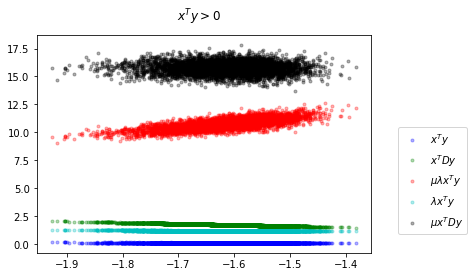

In [8]:
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(neg_change[neg_xy>0],neg_xy[neg_xy>0],'o',markersize=3,alpha=.3,color='b',label='$x^Ty$')
ax.plot(neg_change[neg_xy>0],neg_xDy[neg_xy>0],'o',markersize=3,alpha=.3,color='g',label='$x^TDy$')
ax.plot(neg_change[neg_xy>0],neg_mu_lamb_xy[neg_xy>0],'o',markersize=3,alpha=.3,color='r',label='$\mu\lambda x^Ty$')
ax.plot(neg_change[neg_xy>0],neg_lamb_xy[neg_xy>0],'o',markersize=3,alpha=.3,color='c',label='$\lambda x^Ty$')
ax.plot(neg_change[neg_xy>0],neg_mu_xDy[neg_xy>0],'o',markersize=3,alpha=.3,color='k',label='$\mu x^TDy$')
ax.legend(bbox_to_anchor=(1.3,.6))
plt.suptitle('$x^Ty>0$')
plt.savefig('test_2_pos.pdf')
plt.show()

/anaconda/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


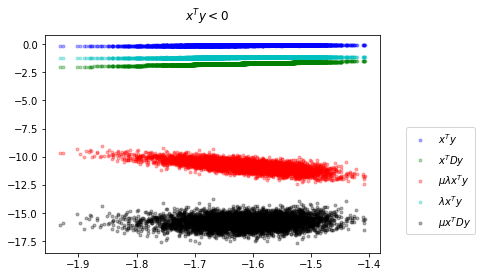

In [9]:
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(neg_change[neg_xy<0],neg_xy[neg_xy<0],'o',markersize=3,alpha=.3,color='b',label='$x^Ty$')
ax.plot(neg_change[neg_xy<0],neg_xDy[neg_xy<0],'o',markersize=3,alpha=.3,color='g',label='$x^TDy$')
ax.plot(neg_change[neg_xy<0],neg_mu_lamb_xy[neg_xy<0],'o',markersize=3,alpha=.3,color='r',label='$\mu\lambda x^Ty$')
ax.plot(neg_change[neg_xy<0],neg_lamb_xy[neg_xy<0],'o',markersize=3,alpha=.3,color='c',label='$\lambda x^Ty$')
ax.plot(neg_change[neg_xy<0],neg_mu_xDy[neg_xy<0],'o',markersize=3,alpha=.3,color='k',label='$\mu x^TDy$')
ax.legend(bbox_to_anchor=(1.3,.6))
plt.suptitle('$x^Ty<0$')
plt.savefig('test_2_neg.pdf')
plt.show()

In [10]:
# Plot points with positive change
new_mask = np.where(change > 0)

In [11]:
pos_xy = xy[new_mask]
pos_xDy = xDy[new_mask]
pos_mu_lamb_xy = mu_lamb_xy[new_mask]
pos_lamb_xy = lamb_xy[new_mask]
pos_mu_xDy = mu_xDy[new_mask]
pos_change = change[new_mask]

/anaconda/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


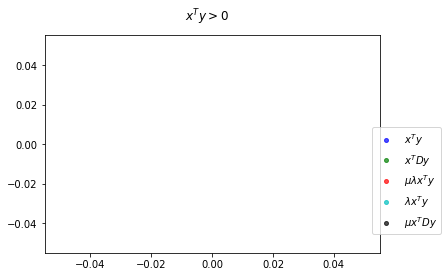

In [12]:
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(pos_change[pos_xy>0],pos_xy[pos_xy>0],'o',markersize=4,alpha=.7,color='b',label='$x^Ty$')
ax.plot(pos_change[pos_xy>0],pos_xDy[pos_xy>0],'o',markersize=4,alpha=.7,color='g',label='$x^TDy$')
ax.plot(pos_change[pos_xy>0],pos_mu_lamb_xy[pos_xy>0],'o',markersize=4,alpha=.7,color='r',label='$\mu\lambda x^Ty$')
ax.plot(pos_change[pos_xy>0],pos_lamb_xy[pos_xy>0],'o',markersize=4,alpha=.7,color='c',label='$\lambda x^Ty$')
ax.plot(pos_change[pos_xy>0],pos_mu_xDy[pos_xy>0],'o',markersize=4,alpha=.7,color='k',label='$\mu x^TDy$')
ax.legend(bbox_to_anchor=(1.2,.6))
plt.suptitle('$x^Ty>0$')
plt.show('test_2_pos_rare.pdf')
plt.show()

/anaconda/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


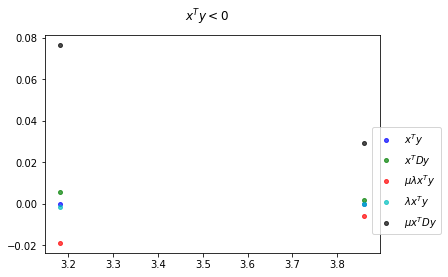

In [13]:
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(pos_change[pos_xy<0],pos_xy[pos_xy<0],'o',markersize=4,alpha=.7,color='b',label='$x^Ty$')
ax.plot(pos_change[pos_xy<0],pos_xDy[pos_xy<0],'o',markersize=4,alpha=.7,color='g',label='$x^TDy$')
ax.plot(pos_change[pos_xy<0],pos_mu_lamb_xy[pos_xy<0],'o',markersize=4,alpha=.7,color='r',label='$\mu\lambda x^Ty$')
ax.plot(pos_change[pos_xy<0],pos_lamb_xy[pos_xy<0],'o',markersize=4,alpha=.7,color='c',label='$\lambda x^Ty$')
ax.plot(pos_change[pos_xy<0],pos_mu_xDy[pos_xy<0],'o',markersize=4,alpha=.7,color='k',label='$\mu x^TDy$')
ax.legend(bbox_to_anchor=(1.2,.6))
plt.suptitle('$x^Ty<0$')
plt.savefig('test_2_neg_rare.pdf')
plt.show()

In [19]:
test = rare_cases[0]
test_2 = rare_cases[1]

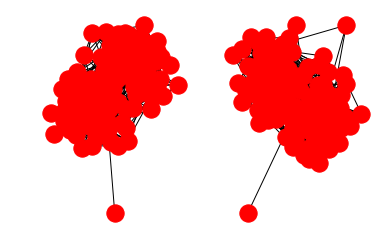

In [23]:
fig, axs = plt.subplots(1,2)
axs = axs.ravel()
nx.draw(test,ax=axs[0],pos=nx.spring_layout(test))
nx.draw(test_2,ax=axs[1],pos=nx.spring_layout(test_2))
plt.show()

In [16]:
nx.adjacency_matrix(test).todense()

matrix([[0, 0, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 1, 0],
        [0, 0, 0, ..., 1, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [17]:
la.eig(nx.adjacency_matrix(test).todense())

(array([ 14.84778754+0.j,  10.61835169+0.j,  -6.69247351+0.j,
          6.16190888+0.j,  -6.20852552+0.j,   5.72368576+0.j,
         -5.98545979+0.j,  -5.83443676+0.j,   5.42069915+0.j,
          5.30257394+0.j,  -5.57802965+0.j,  -5.41264598+0.j,
          5.23893789+0.j,  -5.34499526+0.j,   5.02495066+0.j,
         -5.24363182+0.j,   4.74318705+0.j,   4.57678946+0.j,
         -5.06275988+0.j,  -4.94015622+0.j,  -4.76352852+0.j,
         -4.60734381+0.j,   4.48041593+0.j,  -4.39322377+0.j,
         -4.32133495+0.j,  -4.24971625+0.j,   4.24146244+0.j,
          4.19148372+0.j,  -3.98579592+0.j,   3.81356558+0.j,
          3.75706126+0.j,  -3.83147500+0.j,   3.63397418+0.j,
         -3.76177389+0.j,  -3.65319359+0.j,  -3.57357536+0.j,
          3.53594900+0.j,   3.46499215+0.j,   3.40734371+0.j,
          3.32287795+0.j,   3.23981036+0.j,  -3.41878377+0.j,
         -3.25081394+0.j,   2.96885209+0.j,   2.89389757+0.j,
         -3.11694069+0.j,   2.77556031+0.j,   2.64796198+0.j,
        

In [3]:
X = np.array([[0,1,0,0,0,0],[1,0,1,0,1,0],[0,1,0,0,0,0],[-1,0,0,0,0,0],[0,-1,0,0,0,0],[0,0,-1,0,0,0]])
vals, vecs = la.eig(X)

In [5]:
vals[3]

(1.0000000000000007+0j)

In [6]:
vecs[:,3]

array([-0.40824829, -0.40824829, -0.40824829,  0.40824829,  0.40824829,
        0.40824829])

In [7]:
1/np.sqrt(6)

0.40824829046386307

In [8]:
Y = np.array([[0,1,0,0,0,0],[0,0,0,0,0,0],[0,0,0,1,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0]])

In [9]:
la.eig(Y)

(array([ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j]),
 array([[  1.00000000e+000,  -1.00000000e+000,   0.00000000e+000,
           0.00000000e+000,   0.00000000e+000,   0.00000000e+000],
        [  0.00000000e+000,   6.01250508e-292,   0.00000000e+000,
           0.00000000e+000,   0.00000000e+000,   0.00000000e+000],
        [  0.00000000e+000,   0.00000000e+000,   1.00000000e+000,
          -1.00000000e+000,   0.00000000e+000,   0.00000000e+000],
        [  0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
           6.01250508e-292,   0.00000000e+000,   0.00000000e+000],
        [  0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
           0.00000000e+000,   1.00000000e+000,   0.00000000e+000],
        [  0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
           0.00000000e+000,   0.00000000e+000,   1.00000000e+000]]))

In [10]:
4+np.sqrt(2)

5.4142135623730949

In [11]:
np.sqrt(14)

3.7416573867739413